In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Load the CSV file to examine its contents
file_path = '1C_Table.csv'
data = pd.read_csv(file_path)
data

,Feature,Group,prediction
0,Akkermansia,R12T12,0.2580
1,NaN,R3T3,0.2190
2,NaN,R123T123,0.1550
3,NaN,R123T3,0.2130
4,One-carbon metabolic process,R12T12,0.5570
5,NaN,R3T3,0.2790
6,NaN,R123T123,0.2760
7,NaN,R123T3,0.2660
8,Methanogenesis,R12T12,0.5456
9,NaN,R3T3,0.2441


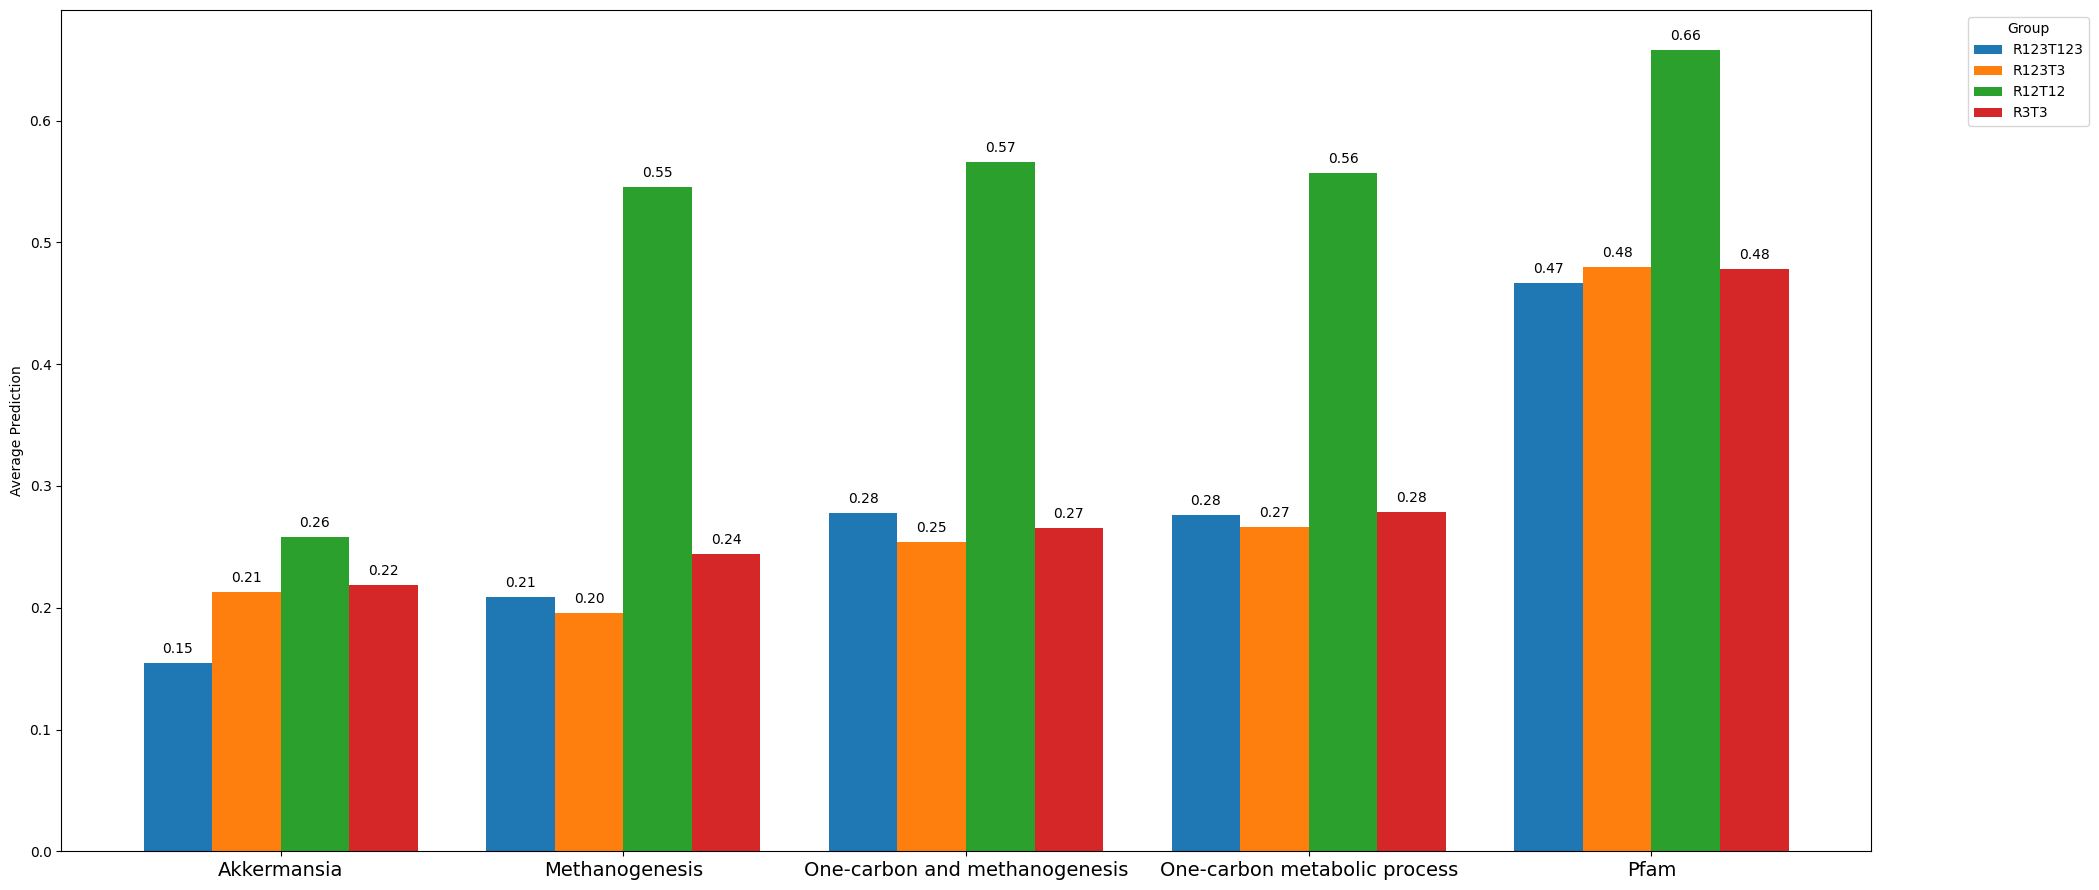

In [25]:
# Cleaning the data
cleaned_data = data[['Feature', 'Group', 'prediction']].copy()
cleaned_data['Feature'].fillna(method='ffill', inplace=True)

# Create a pivot table for better plotting with 'Group' as columns and 'Feature' as index
pivot_data = cleaned_data.pivot_table(values='prediction', index='Feature', columns='Group', aggfunc='mean')

# Corrected plotting with numpy imported for handling array operations
fig, ax = plt.subplots(figsize=(21, 9))

# Using a custom bar width and adjusting positions for spacing
bar_width = 0.2
num_groups = len(pivot_data.columns)
for i, group in enumerate(pivot_data.columns):
    ax.bar(x=np.arange(len(pivot_data.index)) + i * bar_width, height=pivot_data[group], 
           width=bar_width, label=group, align='center')

ax.set_xticks(np.arange(len(pivot_data.index)) + bar_width * (num_groups - 1) / 2)
ax.set_xticklabels(pivot_data.index)
plt.title('')
plt.ylabel('Average Prediction')
plt.xlabel('')
ax.tick_params(axis='x', labelsize=14) 
plt.xticks(rotation=0)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
# Annotate each bar with the numeric value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [26]:
# Load the CSV file to examine its contents
file_path = '1C_Table.1.csv'
data = pd.read_csv(file_path)
data

,Feature,Group,prediction
0,R12T12,Akkermansia,0.2580
1,NaN,One-carbon metabolic process,0.5570
2,NaN,One-carbon and methanogenesis,0.5658
3,NaN,Pfam,0.6580
4,NaN,Methanogenesis,0.5456
5,R3T3,Akkermansia,0.2190
6,NaN,One-carbon metabolic process,0.2790
7,NaN,One-carbon and methanogenesis,0.2655
8,NaN,Pfam,0.4780
9,NaN,Methanogenesis,0.2441


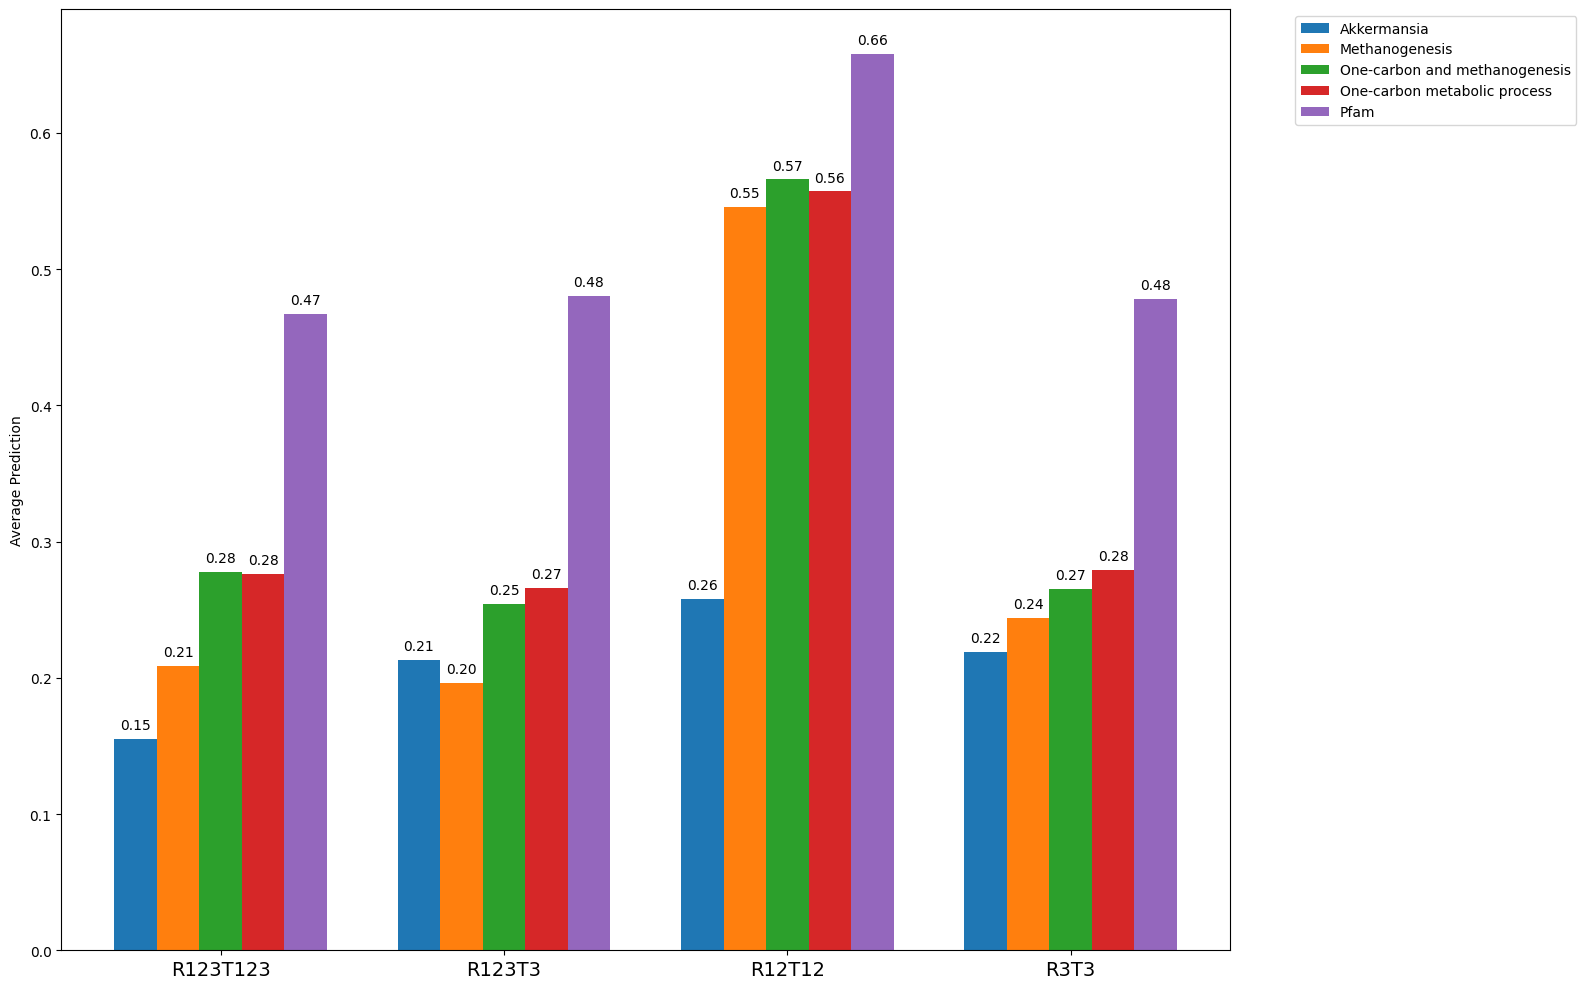

In [27]:
# Cleaning the data
cleaned_data = data[['Feature', 'Group', 'prediction']].copy()
cleaned_data['Feature'].fillna(method='ffill', inplace=True)

# Create a pivot table for better plotting with 'Group' as columns and 'Feature' as index
pivot_data = cleaned_data.pivot_table(values='prediction', index='Feature', columns='Group', aggfunc='mean')

# Corrected plotting with numpy imported for handling array operations
fig, ax = plt.subplots(figsize=(16, 10))

# Using a custom bar width and adjusting positions for spacing
bar_width = 0.15
num_groups = len(pivot_data.columns)
for i, group in enumerate(pivot_data.columns):
    ax.bar(x=np.arange(len(pivot_data.index)) + i * bar_width, height=pivot_data[group], 
           width=bar_width, label=group, align='center')

ax.set_xticks(np.arange(len(pivot_data.index)) + bar_width * (num_groups - 1) / 2)
ax.set_xticklabels(pivot_data.index)
plt.title('')
plt.ylabel('Average Prediction')
plt.xlabel('')
ax.tick_params(axis='x', labelsize=14) 
plt.xticks(rotation=0)
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
# Annotate each bar with the numeric value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

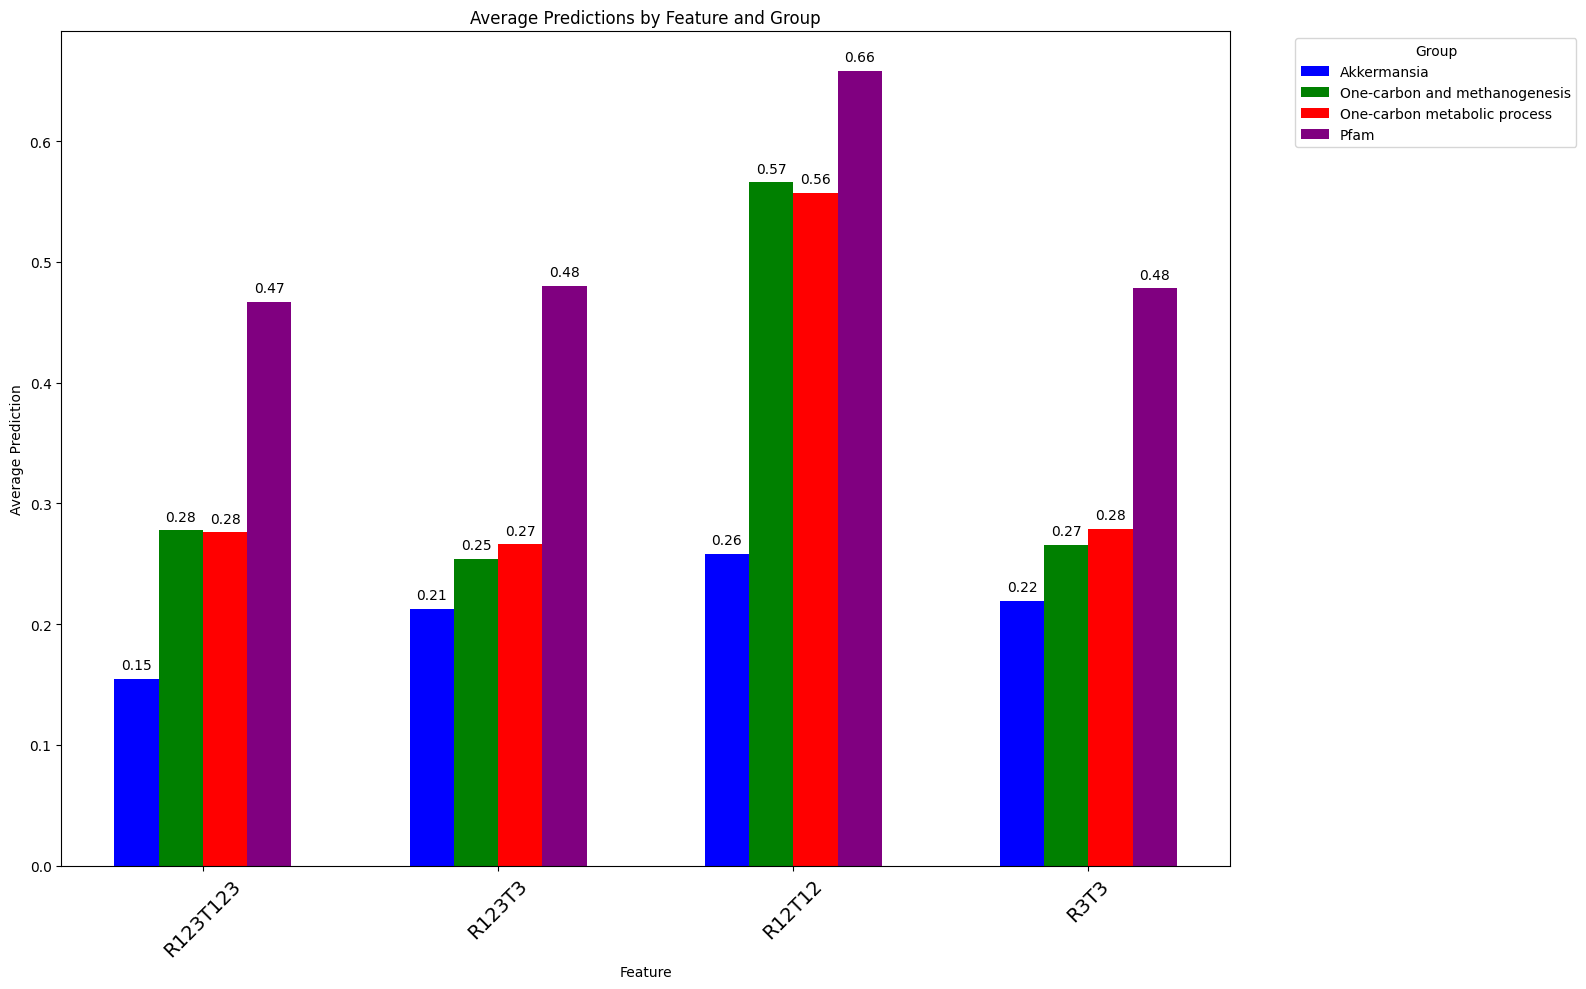

In [28]:


# Load the data
file_path = '1C_Table.2.csv'
data = pd.read_csv(file_path)

# Cleaning the data
cleaned_data = data[['Feature', 'Group', 'prediction']].copy()
cleaned_data['Feature'].fillna(method='ffill', inplace=True)

# Create a pivot table for better plotting with 'Group' as columns and 'Feature' as index
pivot_data = cleaned_data.pivot_table(values='prediction', index='Feature', columns='Group', aggfunc='mean')

# Corrected plotting with numpy imported for handling array operations
fig, ax = plt.subplots(figsize=(16, 10))

# Using a custom bar width and adjusting positions for spacing
bar_width = 0.15
num_groups = len(pivot_data.columns)

# Define specific colors for the bars
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Add more colors if there are more groups

for i, (group, color) in enumerate(zip(pivot_data.columns, colors)):
    ax.bar(x=np.arange(len(pivot_data.index)) + i * bar_width, height=pivot_data[group], 
           width=bar_width, label=group, align='center', color=color)

ax.set_xticks(np.arange(len(pivot_data.index)) + bar_width * (num_groups - 1) / 2)
ax.set_xticklabels(pivot_data.index)
plt.title('Average Predictions by Feature and Group')
plt.ylabel('Average Prediction')
plt.xlabel('Feature')
ax.tick_params(axis='x', labelsize=14) 
plt.xticks(rotation=45)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numeric value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout()
plt.show()


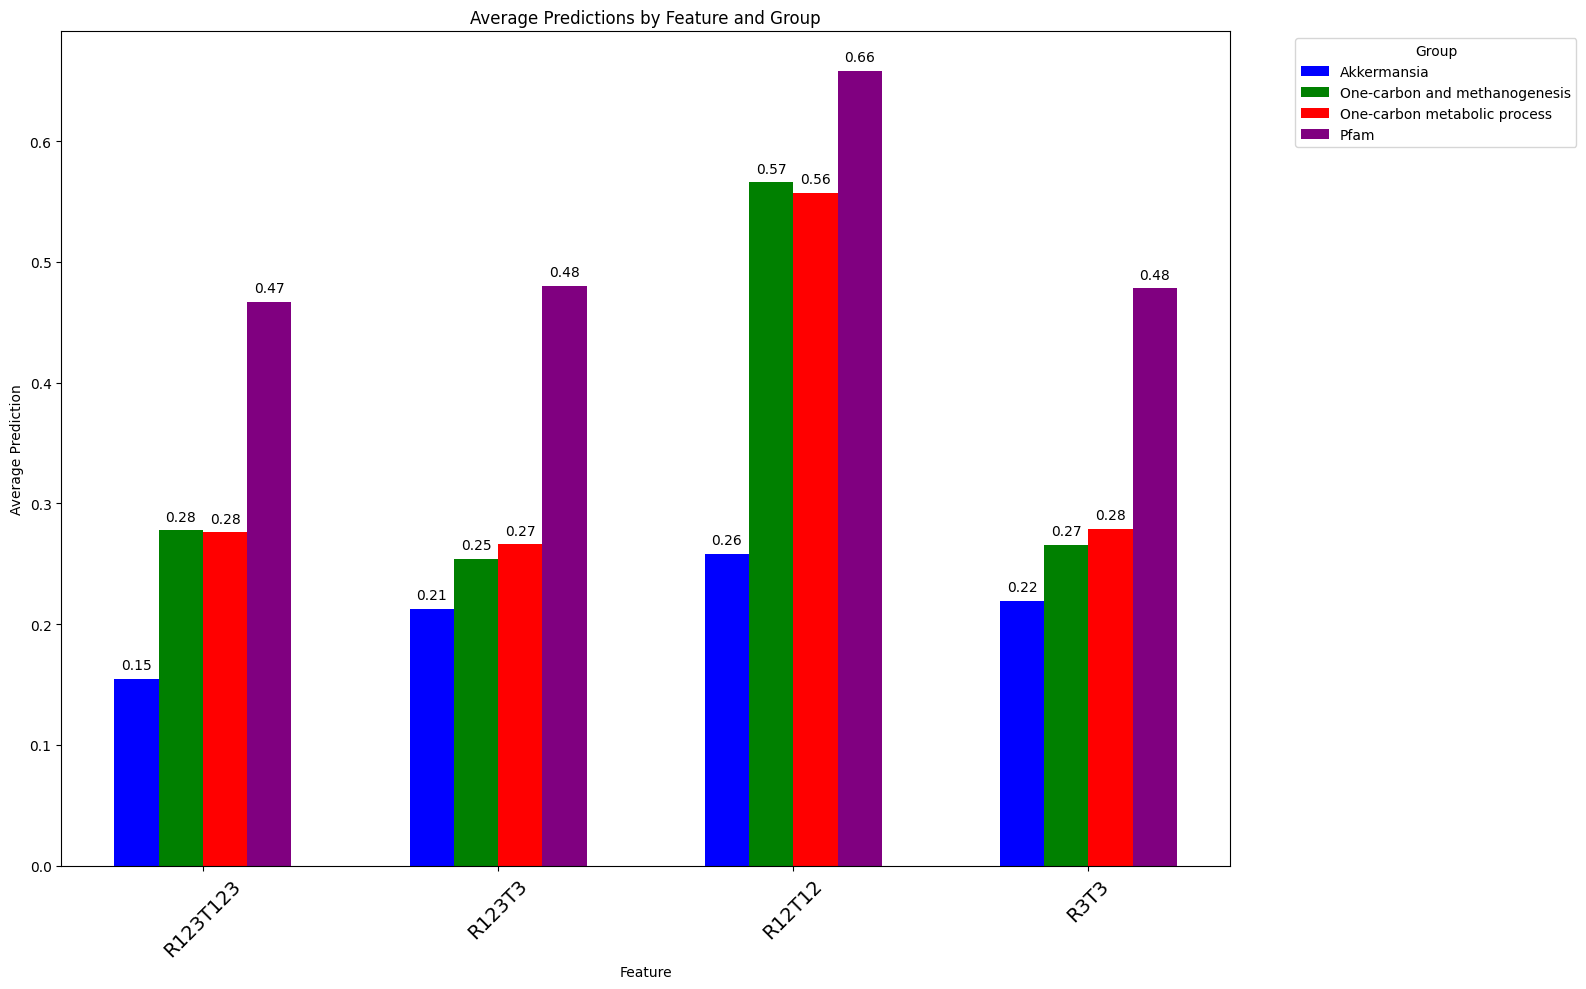

In [29]:
# Load the data
file_path = '1C_Table.2.csv'
data = pd.read_csv(file_path)

# Cleaning the data
cleaned_data = data[['Feature', 'Group', 'prediction']].copy()
cleaned_data['Feature'].fillna(method='ffill', inplace=True)

# Create a pivot table for better plotting with 'Group' as columns and 'Feature' as index
pivot_data = cleaned_data.pivot_table(values='prediction', index='Feature', columns='Group', aggfunc='mean')

# Corrected plotting with numpy imported for handling array operations
fig, ax = plt.subplots(figsize=(16, 10))

# Using a custom bar width and adjusting positions for spacing
bar_width = 0.15
num_groups = len(pivot_data.columns)

# Define specific colors for the bars
colors = ['blue', 'green','red', 'purple', 'orange']  # Add more colors if there are more groups

for i, (group, color) in enumerate(zip(pivot_data.columns, colors)):
    ax.bar(x=np.arange(len(pivot_data.index)) + i * bar_width, height=pivot_data[group], 
           width=bar_width, label=group, align='center', color=color)

ax.set_xticks(np.arange(len(pivot_data.index)) + bar_width * (num_groups - 1) / 2)
ax.set_xticklabels(pivot_data.index)
plt.title('Average Predictions by Feature and Group')
plt.ylabel('Average Prediction')
plt.xlabel('Feature')
ax.tick_params(axis='x', labelsize=14) 
plt.xticks(rotation=45)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numeric value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

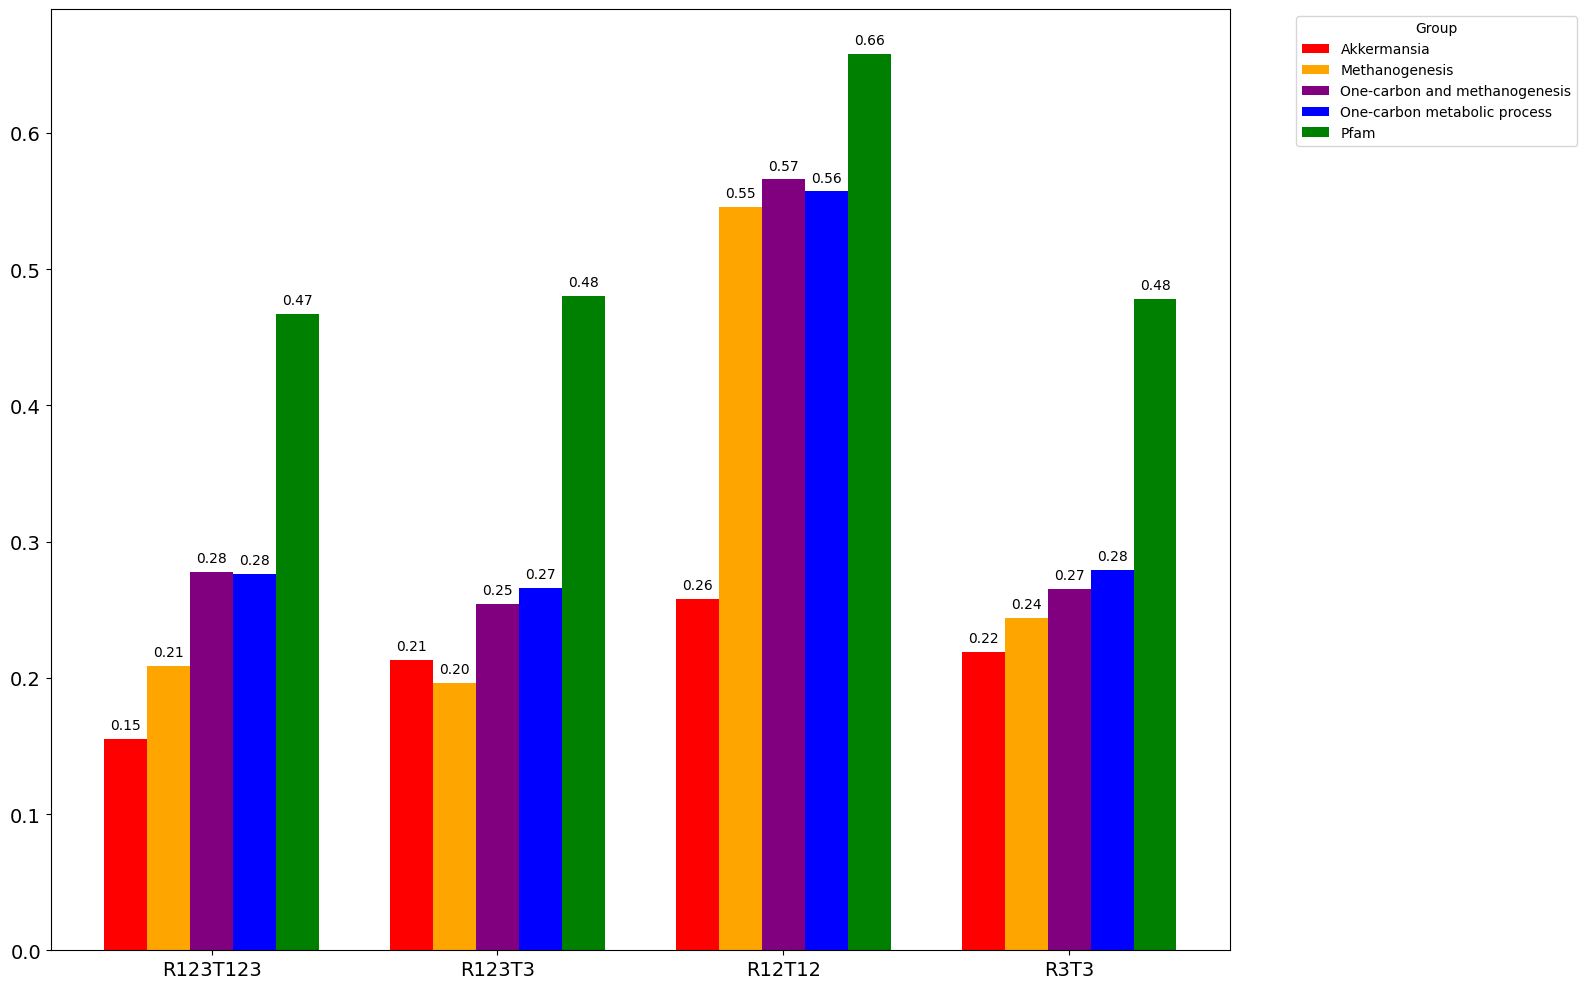

In [30]:

# Load the data
file_path = '1C_Table.1.csv'
data = pd.read_csv(file_path)

# Cleaning the data
cleaned_data = data[['Feature', 'Group', 'prediction']].copy()
cleaned_data['Feature'].fillna(method='ffill', inplace=True)

# Create a pivot table for better plotting with 'Group' as columns and 'Feature' as index
pivot_data = cleaned_data.pivot_table(values='prediction', index='Feature', columns='Group', aggfunc='mean')

# Define specific colors for each group
color_map = {
    'Akkermansia': 'red',
    'Pfam': 'green',
    'One-carbon metabolic process': 'blue',
    'One-carbon and methanogenesis': 'purple',
    'Methanogenesis': 'orange'
}

# Plotting
fig, ax = plt.subplots(figsize=(16, 10))

# Define custom bar width
bar_width = 0.15
num_groups = len(pivot_data.columns)

# Plot bars with specific colors for each group
for i, group in enumerate(pivot_data.columns):
    ax.bar(x=np.arange(len(pivot_data.index)) + i * bar_width, height=pivot_data[group], 
           width=bar_width, label=group, color=color_map.get(group, 'grey'), align='center')

# Set the x-ticks and labels
ax.set_xticks(np.arange(len(pivot_data.index)) + bar_width * (num_groups - 1) / 2)
ax.set_xticklabels(pivot_data.index)
plt.title('')
plt.ylabel('')
plt.xlabel('')
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
plt.xticks(rotation=0)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numeric value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


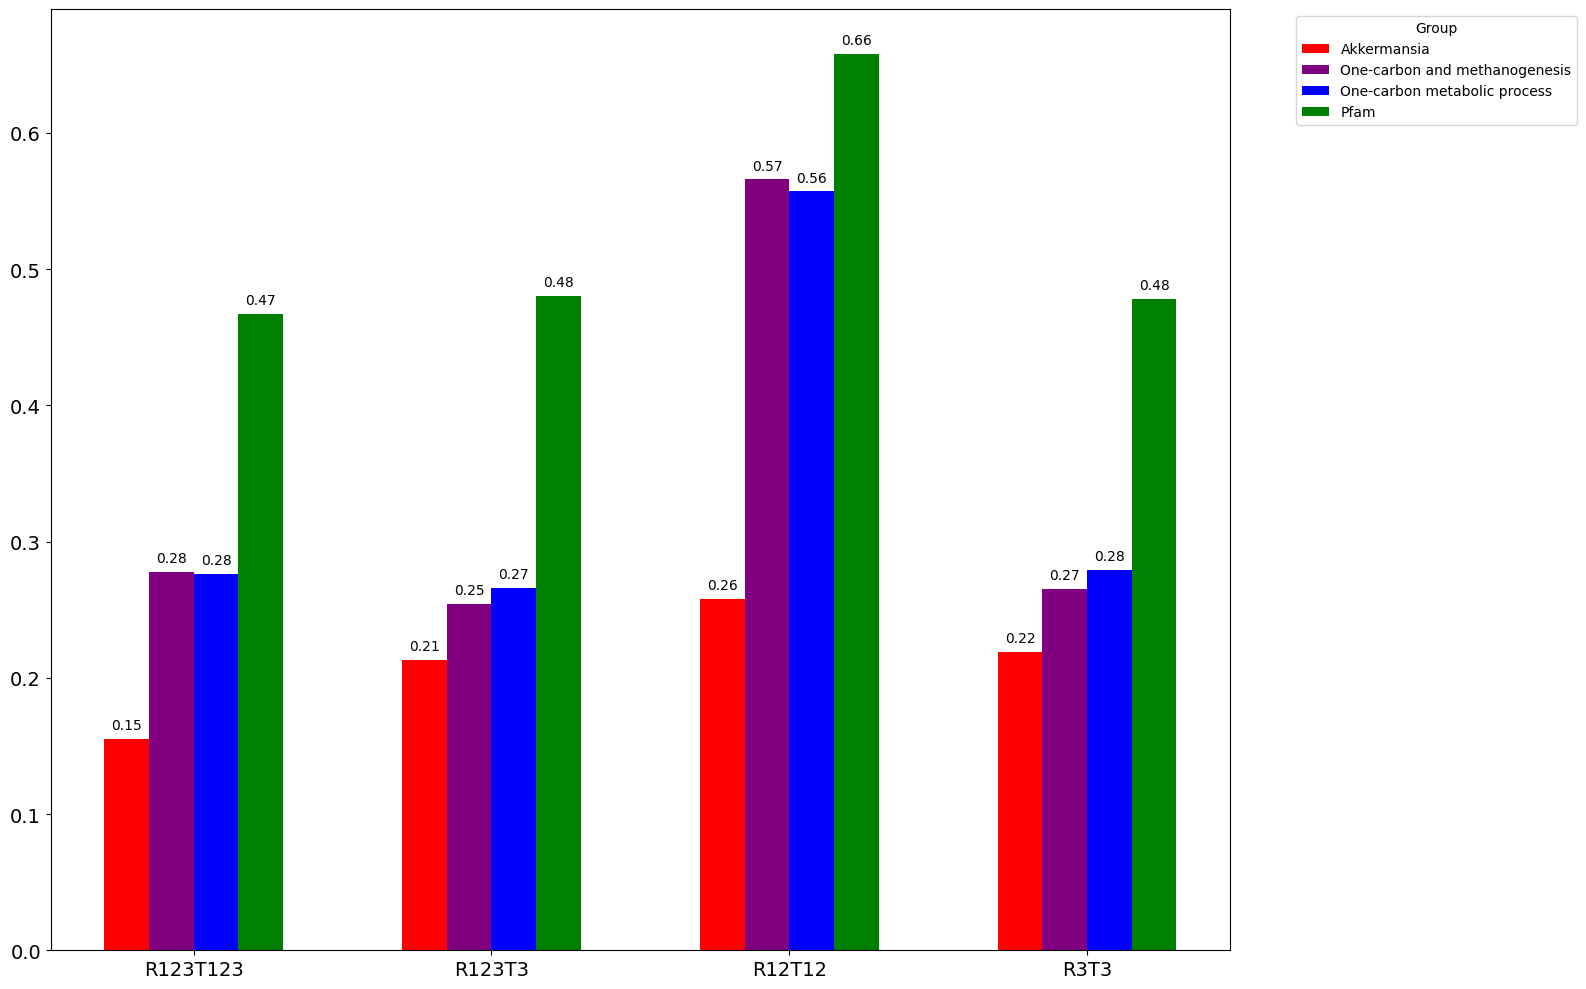

In [31]:
# Load the data
file_path = '1C_Table.2.csv'
data = pd.read_csv(file_path)

# Cleaning the data
cleaned_data = data[['Feature', 'Group', 'prediction']].copy()
cleaned_data['Feature'].fillna(method='ffill', inplace=True)

# Create a pivot table for better plotting with 'Group' as columns and 'Feature' as index
pivot_data = cleaned_data.pivot_table(values='prediction', index='Feature', columns='Group', aggfunc='mean')

# Define specific colors for each group
color_map = {
    'Akkermansia': 'red',
    'Pfam': 'green',
    'One-carbon metabolic process': 'blue',
    'One-carbon and methanogenesis': 'purple'
    # 'Methanogenesis': 'orange'
}

# Plotting
fig, ax = plt.subplots(figsize=(16, 10))

# Define custom bar width
bar_width = 0.15
num_groups = len(pivot_data.columns)

# Plot bars with specific colors for each group
for i, group in enumerate(pivot_data.columns):
    ax.bar(x=np.arange(len(pivot_data.index)) + i * bar_width, height=pivot_data[group], 
           width=bar_width, label=group, color=color_map.get(group, 'grey'), align='center')

# Set the x-ticks and labels
ax.set_xticks(np.arange(len(pivot_data.index)) + bar_width * (num_groups - 1) / 2)
ax.set_xticklabels(pivot_data.index)
plt.title('')
plt.ylabel('')
plt.xlabel('')
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
plt.xticks(rotation=0)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the numeric value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()